# 셀프 주유소 가격분석
- selenium 활용하여 브라우저 제어
- python > 브라우저 > web server: 파이썬 코드로 브라우저를 제어함 (=매크로)
---

In [1]:
from selenium import webdriver

In [2]:
# 경고창 없애기
import warnings
warnings.filterwarnings('ignore')

# 지역별 주유 가격

In [39]:
driver = webdriver.Chrome('./driver/chromedriver.exe')

In [41]:
# 메인 화면 주소: https://www.opinet.co.kr/user/main/mainView.do
# 싼 주유소 찾기 주소: https://www.opinet.co.kr/searRgSelect.do
driver.get('https://www.opinet.co.kr/searRgSelect.do')

In [42]:
# 지역선택
#1. 구 정보 추출
gu_list_selectbox = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]') #셀렉트 박스 선택

In [52]:
gu_list = gu_list_selectbox.find_elements_by_tag_name('option') # 셀렉트 박스 안에 있는 옵션 리스트 가져오기

In [53]:
gu_names = [option.get_attribute('value') for option in gu_list] # 가져온 옵션을 리스트에 담기

In [54]:
gu_names

['',
 '강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [55]:
gu_names.remove('') # 첫째 칸에 있는 공백 제거
gu_names[:5]

['강남구', '강동구', '강북구', '강서구', '관악구']

In [56]:
gu_names[0]

'강남구'

In [57]:
# 셀렉트 박스에서 강남구 선택되도록 처리
# SIGUNGU_NM0
element = driver.find_element_by_id('SIGUNGU_NM0')

In [59]:
# 검색 버튼 클릭 처리
xpath = '//*[@id="searRgSelect"]'
element_sel_gu = driver.find_element_by_xpath(xpath)

In [60]:
#엑셀 저장 버튼 클릭
xpath = '//*[@id="glopopd_excel"]'
element_get_exel = driver.find_element_by_xpath(xpath).click()

### 25개 구의 주유소 가격 다운로드

In [61]:
import time
from tqdm import tqdm

In [62]:
for gu in tqdm(gu_names):
    element = driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(gu)
    
    time.sleep(2)
    
    xpath = '//*[@id="searRgSelect"]'
    driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    
    xpath = '//*[@id="glopopd_excel"]'
    driver.find_element_by_xpath(xpath).click()

In [63]:
driver.close()

# 구별 주유 가격에 대한 데이터 정리

In [1]:
import numpy as np
import pandas as pd
from glob import glob #파일 목록 추출해서 리스트로 만듦

In [2]:
# 지역_위치별(주유소).xls 저장된 파일명 리스트로 가져오기
glob('./data/지역*.xls')

['./data\\지역_위치별(주유소) (1).xls',
 './data\\지역_위치별(주유소) (10).xls',
 './data\\지역_위치별(주유소) (11).xls',
 './data\\지역_위치별(주유소) (12).xls',
 './data\\지역_위치별(주유소) (13).xls',
 './data\\지역_위치별(주유소) (14).xls',
 './data\\지역_위치별(주유소) (15).xls',
 './data\\지역_위치별(주유소) (16).xls',
 './data\\지역_위치별(주유소) (17).xls',
 './data\\지역_위치별(주유소) (18).xls',
 './data\\지역_위치별(주유소) (19).xls',
 './data\\지역_위치별(주유소) (2).xls',
 './data\\지역_위치별(주유소) (20).xls',
 './data\\지역_위치별(주유소) (21).xls',
 './data\\지역_위치별(주유소) (22).xls',
 './data\\지역_위치별(주유소) (23).xls',
 './data\\지역_위치별(주유소) (24).xls',
 './data\\지역_위치별(주유소) (3).xls',
 './data\\지역_위치별(주유소) (4).xls',
 './data\\지역_위치별(주유소) (5).xls',
 './data\\지역_위치별(주유소) (6).xls',
 './data\\지역_위치별(주유소) (7).xls',
 './data\\지역_위치별(주유소) (8).xls',
 './data\\지역_위치별(주유소) (9).xls',
 './data\\지역_위치별(주유소).xls']

In [3]:
#위 파일들을 데이터 프레임으로 생성
tmp_raw = []

for file_name in glob('./data/지역*.xls'):
    tmp = pd.read_excel(file_name, header=2) #header=2: 위부터 2개 행 지움 > 엑셀을 데이터프레임으로 만듦
    tmp_raw.append(tmp) #각 데이터프레임을 리스트에 담음 > 조회하면 데이터프레임으로 조회됨
    
tmp_raw

[       지역                    상호                            주소      상표  \
 0   서울특별시       (주)퍼스트오일 코알라주유소     서울특별시 강동구  올림픽로 556 (성내동)   S-OIL   
 1   서울특별시         지에스칼텍스㈜ 신월주유소        서울 강동구 양재대로 1323 (성내동)   GS칼텍스   
 2   서울특별시  재건에너지 재정제2주유소 고속셀프지점  서울특별시 강동구  천호대로 1246 (둔촌제2동)  현대오일뱅크   
 3   서울특별시                구천면주유소         서울 강동구 구천면로 357 (암사동)  현대오일뱅크   
 4   서울특별시     현대오일뱅크㈜직영 명일셀프주유소          서울 강동구 고덕로 168 (명일동)  현대오일뱅크   
 5   서울특별시      주)지유에너지직영 오렌지주유소          서울 강동구 성안로 102 (성내동)   SK에너지   
 6   서울특별시              sk해뜨는주유소         서울 강동구  상일로 132 (강일동)   SK에너지   
 7   서울특별시               방아다리주유소          서울 강동구 동남로 811 (명일동)   SK에너지   
 8   서울특별시        지에스칼텍스㈜ 동서울주유소        서울 강동구 천호대로 1456 (상일동)   GS칼텍스   
 9   서울특별시          대성석유(주)길동주유소              서울 강동구 천호대로 1168   GS칼텍스   
 10  서울특별시        (주)삼표에너지 고덕주유소           서울 강동구 고덕로 39 (암사동)   GS칼텍스   
 11  서울특별시        (주)소모에너지 성내주유소         서울 강동구 올림픽로 578 (성내동)   GS칼텍스   
 12  서울특별시               천호현대주유소      

In [4]:
tmp_raw[0]

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),S-OIL,02-484-1162,Y,-,2018,1918,-
1,서울특별시,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,2185,2035,1945,1500
2,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,2035,1945,-
3,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,2043,1937,-
4,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,2173,2049,1999,-
5,서울특별시,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,2062,1972,1492
6,서울특별시,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),SK에너지,02-442-7801,Y,-,2065,1975,1600
7,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,2065,1975,1500
8,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,2065,1975,-
9,서울특별시,대성석유(주)길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,2274,2085,1999,1650


### 하나의 데이터프레임으로 병합 
- 방법1. merge는 조건으로 합치기
- 방법2. concat을 그냥 다 합치기

In [5]:
station_raw = pd.concat(tmp_raw)
station_raw.info() #가격 정보가 인트인지 확인, 필요없는 컬럼 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 36
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      470 non-null    object
 1   상호      470 non-null    object
 2   주소      470 non-null    object
 3   상표      470 non-null    object
 4   전화번호    470 non-null    object
 5   셀프여부    470 non-null    object
 6   고급휘발유   470 non-null    object
 7   휘발유     470 non-null    object
 8   경유      470 non-null    object
 9   실내등유    470 non-null    object
dtypes: object(10)
memory usage: 40.4+ KB


In [6]:
#필요한 컬럼만 추출하기
stations = pd.DataFrame({
     'Oil_store' : station_raw['상호']
    ,'주소' : station_raw['주소']
    ,'가격' : station_raw['휘발유']
    ,'셀프' : station_raw['셀프여부']
    ,'상표' : station_raw['상표']
})
stations.head()

,Oil_store,주소,가격,셀프,상표
0,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),2018,Y,S-OIL
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),2035,N,GS칼텍스
2,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),2035,Y,현대오일뱅크
3,구천면주유소,서울 강동구 구천면로 357 (암사동),2043,N,현대오일뱅크
4,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2049,Y,현대오일뱅크


In [7]:
stations.iloc[0,1] #0번 로의 1번 컬럼 가져오기

'서울특별시 강동구  올림픽로 556 (성내동)'

In [8]:
# 주소에 '서울특별시' 로 들어가 있으면 split이 가능하지만, '서울 특별시'로 들어가 있는 건 안됨
stations.iloc[0,1].split()

['서울특별시', '강동구', '올림픽로', '556', '(성내동)']

In [9]:
stations.iloc[0,1].split()[1]

'강동구'

In [10]:
#구별로 구분하기 위해 주소 > 구 뽑아내기
# 방법1. for 돌리기
for addr in stations['주소']:
    stations['구'] = addr.split()[1] #구 추출해서 구 컬럼 만들어서 거기에 담기

In [11]:
# 방법2. 내포된 for 돌리기 > 바로 변수에 담을 수 있어서 편리함
stations['구'] = [addr.split()[1] for addr in stations['주소']]

In [12]:
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [13]:
# 가격이 문자열 처리됨 > 안 적은 주유소가 있는 경우 '-'를 넣어놀기 때문에 가격을 문자열로 만들어 놓음 > 확인 후 인트로 바꿔야 함
stations[stations['가격'] == '-'] # 가격에 '-' 들어간 것 찾기

,Oil_store,주소,가격,셀프,상표,구
27,지에스칼텍스㈜ 화일주유소,서울 영등포구 도림로 415,-,Y,GS칼텍스,영등포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
8,현대오일뱅크㈜직영 재동주유소,서울 종로구 율곡로 58 (경운동),-,N,현대오일뱅크,종로구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
15,구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
17,정다운셀프주유소,서울 도봉구 도봉로 635,-,Y,SK에너지,도봉구
34,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
35,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
36,경원주유소,서울 강남구 도산대로 428 (청담동),-,N,S-OIL,강남구


In [14]:
#가격에 '-' 안 들어간 경우만 추출해서 stations에 담기
stations = stations[stations['가격'] != '-']

In [15]:
stations[stations['가격'] == '-'] # '-'들어갔던 값들이 삭제된 것 확인

,Oil_store,주소,가격,셀프,상표,구


In [16]:
#문자열인 가격을 숫자로 변경
stations['가격'] = [float(value) for value in stations['가격']]

In [17]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 33
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  461 non-null    object 
 1   주소         461 non-null    object 
 2   가격         461 non-null    float64
 3   셀프         461 non-null    object 
 4   상표         461 non-null    object 
 5   구          461 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.2+ KB


In [18]:
stations['가격'][0]

0    2018.0
0    1985.0
0    2029.0
0    1996.0
0    1999.0
0    1978.0
0    1998.0
0    1982.0
0    1978.0
0    1979.0
0    1987.0
0    1998.0
0    2217.0
0    2003.0
0    2089.0
0    1999.0
0    1995.0
0    1983.0
0    1998.0
0    2027.0
0    1987.0
0    1985.0
0    1988.0
0    2007.0
0    1955.0
Name: 가격, dtype: float64

In [19]:
stations.head(30) # 인덱스가 중복됨 > 리 인덱스 작업해야 함

,Oil_store,주소,가격,셀프,상표,구
0,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),2018.0,Y,S-OIL,강동구
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),2035.0,N,GS칼텍스,강동구
2,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),2035.0,Y,현대오일뱅크,강동구
3,구천면주유소,서울 강동구 구천면로 357 (암사동),2043.0,N,현대오일뱅크,강동구
4,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2049.0,Y,현대오일뱅크,강동구
5,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2062.0,N,SK에너지,강동구
6,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),2065.0,Y,SK에너지,강동구
7,방아다리주유소,서울 강동구 동남로 811 (명일동),2065.0,Y,SK에너지,강동구
8,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),2065.0,Y,GS칼텍스,강동구
9,대성석유(주)길동주유소,서울 강동구 천호대로 1168,2085.0,N,GS칼텍스,강동구


In [20]:
#인덱스 다시 매기기
stations.reset_index(inplace=True)
stations.head(30)

,index,Oil_store,주소,가격,셀프,상표,구
0,0,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),2018.0,Y,S-OIL,강동구
1,1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),2035.0,N,GS칼텍스,강동구
2,2,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),2035.0,Y,현대오일뱅크,강동구
3,3,구천면주유소,서울 강동구 구천면로 357 (암사동),2043.0,N,현대오일뱅크,강동구
4,4,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2049.0,Y,현대오일뱅크,강동구
5,5,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2062.0,N,SK에너지,강동구
6,6,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),2065.0,Y,SK에너지,강동구
7,7,방아다리주유소,서울 강동구 동남로 811 (명일동),2065.0,Y,SK에너지,강동구
8,8,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),2065.0,Y,GS칼텍스,강동구
9,9,대성석유(주)길동주유소,서울 강동구 천호대로 1168,2085.0,N,GS칼텍스,강동구


In [21]:
#이전 인덱스 삭제하기
del stations['index']

In [22]:
#인덱스 지운 거 확인
stations.head(30)

,Oil_store,주소,가격,셀프,상표,구
0,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),2018.0,Y,S-OIL,강동구
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),2035.0,N,GS칼텍스,강동구
2,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),2035.0,Y,현대오일뱅크,강동구
3,구천면주유소,서울 강동구 구천면로 357 (암사동),2043.0,N,현대오일뱅크,강동구
4,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2049.0,Y,현대오일뱅크,강동구
5,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2062.0,N,SK에너지,강동구
6,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),2065.0,Y,SK에너지,강동구
7,방아다리주유소,서울 강동구 동남로 811 (명일동),2065.0,Y,SK에너지,강동구
8,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),2065.0,Y,GS칼텍스,강동구
9,대성석유(주)길동주유소,서울 강동구 천호대로 1168,2085.0,N,GS칼텍스,강동구


In [23]:
stations['상표'].unique()

array(['S-OIL', 'GS칼텍스', '현대오일뱅크', 'SK에너지', '알뜰(ex)', '자가상표', '알뜰주유소'],
      dtype=object)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc #한글처리
path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

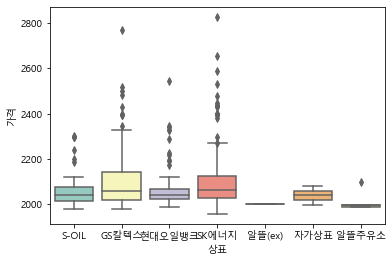

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(
      x = '상표'# x축
    , y = '가격' # y 축
    , data = stations
    , palette='Set3'
)
plt.show()

In [26]:
stations[stations['가격'] == stations['가격'].max()]

,Oil_store,주소,가격,셀프,상표,구
287,서남주유소,서울 중구 통일로 30,2829.0,N,SK에너지,중구


### 지도 시각화

In [27]:
import json
import folium
import googlemaps
import warnings
warnings.filterwarnings('ignore')

In [28]:
#가격 비싼순
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
287,서남주유소,서울 중구 통일로 30,2829.0,N,SK에너지,중구
253,서계주유소,서울특별시 용산구 청파로 367 (청파동),2770.0,N,GS칼텍스,용산구
286,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2654.0,N,SK에너지,중구
252,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2590.0,N,SK에너지,용산구
460,제이제이주유소,서울 강남구 언주로 716,2545.0,N,현대오일뱅크,강남구
251,한석주유소,서울 용산구 이촌로 164,2531.0,N,SK에너지,용산구
285,필동주유소,서울 중구 퇴계로 196 (필동2가),2519.0,N,GS칼텍스,중구
459,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2498.0,N,GS칼텍스,강남구
284,약수주유소,서울 중구 다산로 173,2483.0,N,GS칼텍스,중구
102,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2477.0,N,SK에너지,서초구


In [29]:
#가격 저렴순
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
427,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1955.0,Y,SK에너지,강남구
70,신반포주유소,서울 서초구 사평대로 94 (반포동),1978.0,N,SK에너지,서초구
145,삼화주유소,서울 송파구 백제고분로 125,1978.0,Y,GS칼텍스,송파구
144,아시아주유소,서울 송파구 도곡로 438 (잠실동),1978.0,Y,GS칼텍스,송파구
177,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1979.0,Y,SK에너지,양천구
176,현대주유소,서울 양천구 남부순환로 372 (신월동),1979.0,Y,S-OIL,양천구
178,지에스칼텍스㈜ 서호주유소,서울 양천구 남부순환로 317,1980.0,Y,GS칼텍스,양천구
120,지에스칼텍스(주) 종암주유소,서울 성북구 종암로 145 (종암동),1982.0,Y,GS칼텍스,성북구
302,방화주유소,서울 강서구 방화동로 58-2 (방화동),1983.0,N,SK에너지,강서구
384,구광주유소,서울특별시 금천구 서부샛길 674 (가산동),1985.0,N,S-OIL,금천구


In [30]:
#구별 평균 가격
gu_data = pd.pivot_table(
     stations
    ,index=['구']
    ,values=['가격']
    ,aggfunc=np.mean
)
gu_data.head()

,가격
구,
강남구,2171.647059
강동구,2088.428571
강북구,2027.076923
강서구,2049.968750
관악구,2055.714286


In [31]:
gu_data.sort_values

<bound method DataFrame.sort_values of                가격
구                
강남구   2171.647059
강동구   2088.428571
강북구   2027.076923
강서구   2049.968750
관악구   2055.714286
광진구   2061.200000
구로구   2094.952381
금천구   2039.272727
노원구   2045.266667
도봉구   2046.764706
동대문구  2060.736842
동작구   2077.900000
마포구   2087.416667
서대문구  2031.333333
서초구   2083.454545
성동구   2123.117647
성북구   2024.625000
송파구   2030.718750
양천구   2024.360000
영등포구  2100.703704
용산구   2403.846154
은평구   2025.875000
종로구   2247.875000
중구    2368.100000
중랑구   2024.071429>

In [32]:
#평균가격을 구별로 지도에 표시
geo_path = './data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map( #지도 생성
     location=[37.5502, 126.982] #서울시청
    ,zoom_start=10.5
)

In [33]:
map.choropleth(
      geo_data = geo_str
    , data=gu_data
    , columns=[gu_data.index, '가격']
    , key_on='feature.id'
    , fill_color='PuRd'
)
map

In [38]:
# 상위 10개 주유소 지도에 표시
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
287,서남주유소,서울 중구 통일로 30,2829.0,N,SK에너지,중구
253,서계주유소,서울특별시 용산구 청파로 367 (청파동),2770.0,N,GS칼텍스,용산구
286,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2654.0,N,SK에너지,중구
252,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2590.0,N,SK에너지,용산구
460,제이제이주유소,서울 강남구 언주로 716,2545.0,N,현대오일뱅크,강남구
251,한석주유소,서울 용산구 이촌로 164,2531.0,N,SK에너지,용산구
285,필동주유소,서울 중구 퇴계로 196 (필동2가),2519.0,N,GS칼텍스,중구
459,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2498.0,N,GS칼텍스,강남구
284,약수주유소,서울 중구 다산로 173,2483.0,N,GS칼텍스,중구
102,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2477.0,N,SK에너지,서초구


In [39]:
# 하위 10개 주유소 지도에 표시
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
427,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1955.0,Y,SK에너지,강남구
70,신반포주유소,서울 서초구 사평대로 94 (반포동),1978.0,N,SK에너지,서초구
145,삼화주유소,서울 송파구 백제고분로 125,1978.0,Y,GS칼텍스,송파구
144,아시아주유소,서울 송파구 도곡로 438 (잠실동),1978.0,Y,GS칼텍스,송파구
177,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1979.0,Y,SK에너지,양천구
176,현대주유소,서울 양천구 남부순환로 372 (신월동),1979.0,Y,S-OIL,양천구
178,지에스칼텍스㈜ 서호주유소,서울 양천구 남부순환로 317,1980.0,Y,GS칼텍스,양천구
120,지에스칼텍스(주) 종암주유소,서울 성북구 종암로 145 (종암동),1982.0,Y,GS칼텍스,성북구
302,방화주유소,서울 강서구 방화동로 58-2 (방화동),1983.0,N,SK에너지,강서구
384,구광주유소,서울특별시 금천구 서부샛길 674 (가산동),1985.0,N,S-OIL,금천구


In [41]:
from tqdm import tqdm

In [40]:
#지도상의 주유소 위치 표시하기 (위도, 경도 정보 필요)
#1. 구글맵스 apl key 등록
gmap_key = '-'
gmaps = googlemaps.Client(key=gmap_key)

In [57]:
lat = []
lng = []

for n in tqdm(oil_price_top10.index):
    try: #구글맵에서 위도, 경도 정보를 정상적으로 추출한 경우 처리됨
        tmp_addr = oil_price_top10['주소'][n].split('(')[0] 
        tmp_map = gmaps.geocode(tmp_addr) 
        tmp_loc = tmp_map[0].get('geomatry') 
        lat.append(tmp_loc['location']['lat']) 
        lng.append(tmp_loc['location']['lng']) #추출한 주소값 중에서 위도만 리스트에 담기
    except: #구글맵에서 위도, 경도 정보를 못 가지고 온 경우에 처리됨
        lat.append(np.nan) #값이 정상적이지 않은 애들은 잘못된 값 대신 nan을 넣음
        lng.append(np.nan)
        
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

100%|██████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.43it/s]


,Oil_store,주소,가격,셀프,상표,구,lat,lng
287,서남주유소,서울 중구 통일로 30,2829.0,N,SK에너지,중구,NaN,NaN
253,서계주유소,서울특별시 용산구 청파로 367 (청파동),2770.0,N,GS칼텍스,용산구,NaN,NaN
286,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2654.0,N,SK에너지,중구,NaN,NaN
252,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2590.0,N,SK에너지,용산구,NaN,NaN
460,제이제이주유소,서울 강남구 언주로 716,2545.0,N,현대오일뱅크,강남구,NaN,NaN
251,한석주유소,서울 용산구 이촌로 164,2531.0,N,SK에너지,용산구,NaN,NaN
285,필동주유소,서울 중구 퇴계로 196 (필동2가),2519.0,N,GS칼텍스,중구,NaN,NaN
459,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2498.0,N,GS칼텍스,강남구,NaN,NaN
284,약수주유소,서울 중구 다산로 173,2483.0,N,GS칼텍스,중구,NaN,NaN
102,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2477.0,N,SK에너지,서초구,NaN,NaN


In [58]:
#2. 구글맵스에서 주소 집어넣어서 위도 경도 값 추출 (상하위 10개씩만 추출)
#주유소 주소로 등록된 값에 오타나 형식에 맞지 않게 기입됐을 수 있음 > 에러나서 프로그램 멈추고 이전 데이터 날라감 > 예외처리 코드 필요
lat = []
lng = []

# n <= 287, 253, 286, 252, 460, 251, 285, 459, 284, 102
for n in tqdm(oil_price_top10.index):
    try: #구글맵에서 위도, 경도 정보를 정상적으로 추출한 경우 처리됨
        tmp_addr = oil_price_top10['주소'][n].split('(')[0] #데이터프레임에서 주소 추출
        tmp_map = gmaps.geocode(tmp_addr) #구글맵스에서 주소 검색 > 주소가 잘못되면 여기서 에러남
        tmp_loc = tmp_map[0].get('geometry') #맵스에서 찾은 결과에서 주소값만 추출
        lat.append(tmp_loc['location']['lat']) #추출한 주소값 중에서 경도만 리스트에 담기
        lng.append(tmp_loc['location']['lng'])
    except: #구글맵에서 위도, 경도 정보를 못 가지고 온 경우에 처리됨
        lat.append(np.nan) #값이 정상적이지 않은 애들은 잘못된 값 대신 nan을 넣음
        lng.append(np.nan)

oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

100%|██████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.79it/s]


,Oil_store,주소,가격,셀프,상표,구,lat,lng
287,서남주유소,서울 중구 통일로 30,2829.0,N,SK에너지,중구,37.558348,126.972090
253,서계주유소,서울특별시 용산구 청파로 367 (청파동),2770.0,N,GS칼텍스,용산구,37.552290,126.968935
286,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2654.0,N,SK에너지,중구,37.561648,126.997142
252,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2590.0,N,SK에너지,용산구,37.550179,126.972463
460,제이제이주유소,서울 강남구 언주로 716,2545.0,N,현대오일뱅크,강남구,37.517636,127.035756
251,한석주유소,서울 용산구 이촌로 164,2531.0,N,SK에너지,용산구,37.521421,126.965379
285,필동주유소,서울 중구 퇴계로 196 (필동2가),2519.0,N,GS칼텍스,중구,37.560850,126.993653
459,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2498.0,N,GS칼텍스,강남구,37.511513,127.047093
284,약수주유소,서울 중구 다산로 173,2483.0,N,GS칼텍스,중구,37.559009,127.012663
102,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2477.0,N,SK에너지,서초구,37.480653,126.998505


In [59]:
#하위 10개 위도, 경도 추출
lat = []
lng = []

for n in tqdm(oil_price_bottom10.index):
    try:
        tmp_addr = oil_price_bottom10['주소'][n].split('(')[0]
        tmp_map = gmaps.geocode(tmp_addr)
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
    except:
        lat.append(np.nan)
        lng.append(np.nan)

oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

100%|██████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.51it/s]


,Oil_store,주소,가격,셀프,상표,구,lat,lng
427,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1955.0,Y,SK에너지,강남구,37.467210,127.118713
70,신반포주유소,서울 서초구 사평대로 94 (반포동),1978.0,N,SK에너지,서초구,37.498326,126.994934
145,삼화주유소,서울 송파구 백제고분로 125,1978.0,Y,GS칼텍스,송파구,37.506614,127.080877
144,아시아주유소,서울 송파구 도곡로 438 (잠실동),1978.0,Y,GS칼텍스,송파구,37.504572,127.077380
177,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1979.0,Y,SK에너지,양천구,37.516768,126.854657
176,현대주유소,서울 양천구 남부순환로 372 (신월동),1979.0,Y,S-OIL,양천구,37.533811,126.829240
178,지에스칼텍스㈜ 서호주유소,서울 양천구 남부순환로 317,1980.0,Y,GS칼텍스,양천구,37.538552,126.826928
120,지에스칼텍스(주) 종암주유소,서울 성북구 종암로 145 (종암동),1982.0,Y,GS칼텍스,성북구,37.602751,127.032022
302,방화주유소,서울 강서구 방화동로 58-2 (방화동),1983.0,N,SK에너지,강서구,37.565571,126.812387
384,구광주유소,서울특별시 금천구 서부샛길 674 (가산동),1985.0,N,S-OIL,금천구,37.481968,126.875149


In [51]:
oil_price_top10['주소'][287] #원하는 값 인덱스로 추출

'서울 중구 통일로 30'

In [52]:
oil_price_top10['주소'][253] #주소 데이터 상태 파악 후 어떻게 주소 추출할지 고민 

'서울특별시 용산구  청파로 367 (청파동)'

In [53]:
oil_price_top10['주소'][253].split('(') #두 개로 스플릿

['서울특별시 용산구  청파로 367 ', '청파동)']

In [54]:
oil_price_top10['주소'][253].split('(')[0] #주소값만 추출

'서울특별시 용산구  청파로 367 '

In [48]:
gmaps.geocode(oil_price_top10['주소'][287]) #서울 중구 통일로 30

[{'address_components': [{'long_name': '30',
    'short_name': '30',
    'types': ['premise']},
   {'long_name': 'Tongil-ro',
    'short_name': 'Tongil-ro',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': 'Jung-gu',
    'short_name': 'Jung-gu',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': 'Seoul',
    'short_name': 'Seoul',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': 'South Korea',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-161',
    'short_name': '100-161',
    'types': ['postal_code']}],
  'formatted_address': '30 Tongil-ro, Jung-gu, Seoul, South Korea',
  'geometry': {'location': {'lat': 37.5583477, 'lng': 126.9720901},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.55969668029149,
     'lng': 126.9734390802915},
    'southwest': {'lat': 37.5569987197085, 'lng': 126.9707411197085}}},
  'place_id': 'ChIJH0yrx2Gi

In [50]:
gmaps.geocode(oil_price_top10['주소'][253]) #서울특별시 용산구  청파로 367 (청파동)

[{'address_components': [{'long_name': '367',
    'short_name': '367',
    'types': ['premise']},
   {'long_name': 'Cheongpa-ro',
    'short_name': 'Cheongpa-ro',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': 'Yongsan-gu',
    'short_name': 'Yongsan-gu',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': 'Seoul',
    'short_name': 'Seoul',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': 'South Korea',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '140-140',
    'short_name': '140-140',
    'types': ['postal_code']}],
  'formatted_address': '367 Cheongpa-ro, Yongsan-gu, Seoul, South Korea',
  'geometry': {'location': {'lat': 37.5522895, 'lng': 126.9689354},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.5536384802915,
     'lng': 126.9702843802915},
    'southwest': {'lat': 37.5509405197085, 'lng': 126.9675864197085}}},
  'partial

In [61]:
# 지도에 표시
map = folium.Map(
     location=[37.5202, 126.975] #서울시청 찍음
    ,zoom_start=10.5 #확대해서 표시
)
map

In [62]:
#상위 10개 지도에 표시
for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]): #lat값이 널이 아니면 실행
        folium.CircleMarker( #지도에 마킹
            [ #마킹할 값들을 리스트에 감싸야 됨
                 oil_price_top10['lat'][n] #lat 표시
                ,oil_price_top10['lng'][n] #lng 표시
            ]
            ,radius=15 #표시할 둘레 크기
            ,color='#CD3181' #마크 범위 둘레선 색깔 주기: R(CD) G(31) B(81)
            ,fill_color='CD3181' #마크 범위 배경색 주기
            ,fill=True #마크 범위 안에 색깔 채우기 True
        ).add_to(map) #맵에다가 추가해라
map

In [63]:
#하위 10개 지도에 표시
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]): #lat값이 널이 아니면 실행
        folium.CircleMarker( #지도에 마킹
            [ #마킹할 값들을 리스트에 감싸야 됨
                 oil_price_bottom10['lat'][n] #lat 표시
                ,oil_price_bottom10['lng'][n] #lng 표시
            ]
            ,radius=15 #표시할 둘레 크기
            ,color='#CD3181' #마크 범위 둘레선 색깔 주기: R(CD) G(31) B(81)
            ,fill_color='CD3181' #마크 범위 배경색 주기
            ,fill=True #마크 범위 안에 색깔 채우기 True
        ).add_to(map) #맵에다가 추가해라
map

In [64]:
# 지도 표시
map = folium.Map(
      location=[37.5202, 126.975]
    , zoom_start=10.5
)
map

# 상위 10개
for n in oil_price_top10.index:
#   oil_price_top10['lat'][n]값이 notnull이면
    if pd.notnull(oil_price_top10['lat'][n]): 
        folium.CircleMarker(
            [
                oil_price_top10['lat'][n] # lat
              , oil_price_top10['lng'][n] # lng
            ]
            , radius = 15
            , color = '#CD3181' # color = #RRGGBB
            , fill_color = 'CD3181' # 면색
            , fill = True
        ).add_to(map) # map에 추가해라
map

# 하위 10개
for n in oil_price_bottom10.index:
#   oil_price_top10['lat'][n]값이 notnull이면
    if pd.notnull(oil_price_bottom10['lat'][n]): 
        folium.CircleMarker(
            [
                oil_price_bottom10['lat'][n] # lat
              , oil_price_bottom10['lng'][n] # lng
            ]
            , radius = 15
            , color = '#3186CC' # color = #RRGGBB
            , fill_color = '3186CC' # 면색
            , fill = True
        ).add_to(map) # map에 추가해라
map